In [1]:
using Distributions
using StatsPlots
default(fmt=:png)
using Random

mediannormal(dist, n) = Normal(median(dist), 1/√(4n*pdf(dist, median(dist))^2))

function plot_mediandist(; dist = Uniform(), n = 100, L = 10^5)
    Median = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        Median[i] = median(rand!(dist, tmp[Threads.threadid()]))
    end
    @show dist
    @show n
    @show mean(Median) median(dist)
    @show var(Median) 1/(4n*pdf(dist, median(dist))^2)
    histogram(Median; norm=true, alpha=0.3, label="dist. of sample medians")
    plot!(mediannormal(dist, n); ls=:dash, lw=1.5, label="normal approx.")
end

plot_mediandist (generic function with 1 method)

dist = Uniform{Float64}(a=0.0, b=1.0)
n = 100
mean(Median) = 0.49982247136532487
median(dist) = 0.5
var(Median) = 0.0024190678313977783
1 / ((4n) * pdf(dist, median(dist)) ^ 2) = 0.0025


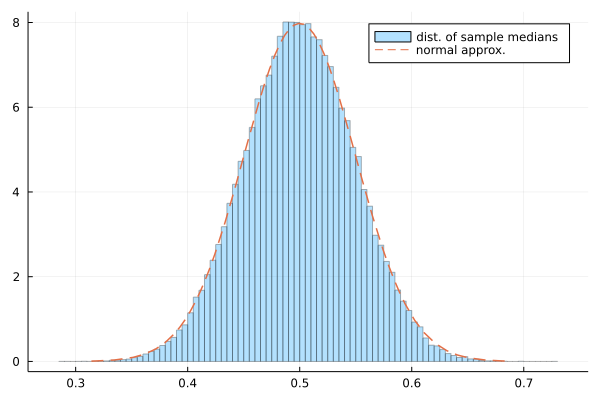

In [2]:
plot_mediandist(; dist = Uniform(), n = 100, L = 10^5)

dist = Beta{Float64}(α=0.5, β=0.6)
n = 100
mean(Median) = 0.4220788351959447
median(dist) = 0.4207328671634375
var(Median) = 0.005009209490374331
1 / ((4n) * pdf(dist, median(dist)) ^ 2) = 0.005231420352373159


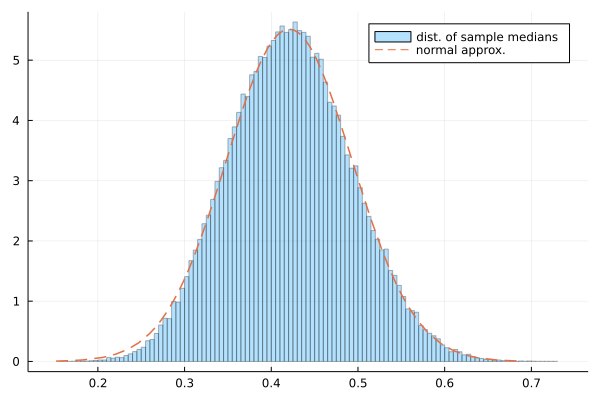

In [3]:
plot_mediandist(; dist = Beta(0.5, 0.6), n = 100, L = 10^5)

dist = Gamma{Float64}(α=2.0, θ=1.0)
n = 100
mean(Median) = 1.6837812080139107
median(dist) = 1.678346990016661
var(Median) = 0.02531839379678589
1 / ((4n) * pdf(dist, median(dist)) ^ 2) = 0.02546655347683454


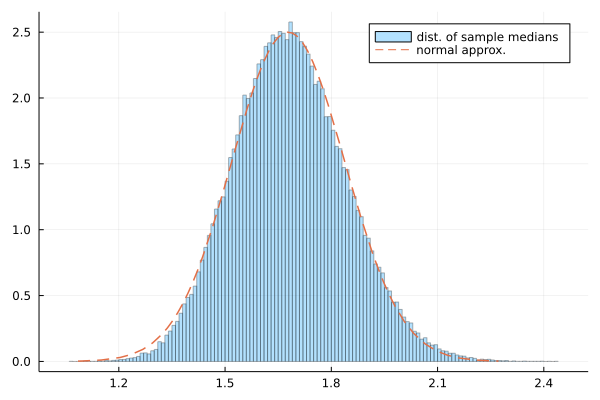

In [4]:
plot_mediandist(; dist = Gamma(2, 1), n = 100, L = 10^5)

dist = LogNormal{Float64}(μ=0.0, σ=1.0)
n = 100
mean(Median) = 1.007804312458208
median(dist) = 1.0
var(Median) = 0.015771510744918307
1 / ((4n) * pdf(dist, median(dist)) ^ 2) = 0.015707963267948963


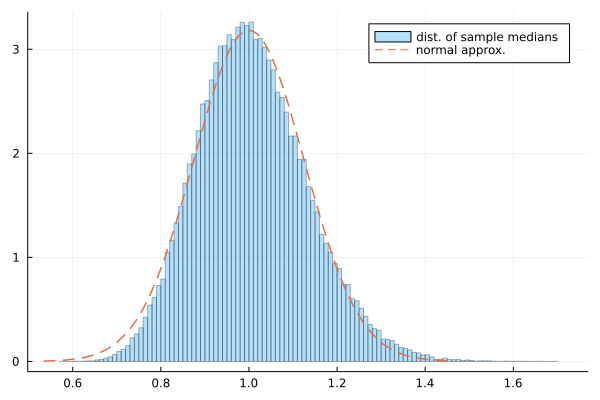

In [5]:
plot_mediandist(; dist = LogNormal(), n = 100, L = 10^5)